# SQL Database from jupyter notebook project

In this project, we will explore an SQL database using jupyter notebook commands.

Some information on jupyter notebook can be found [here](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/?_gl=1*1dj96r2*_gcl_au*MTYwNTc2NzQzMi4xNzEzNjIzNjI2#17executingshellcommands).

## Chinook Schema

In this project, we will use the Chinook database, which is a music sales database. The schema of this database can be found in Image 1.

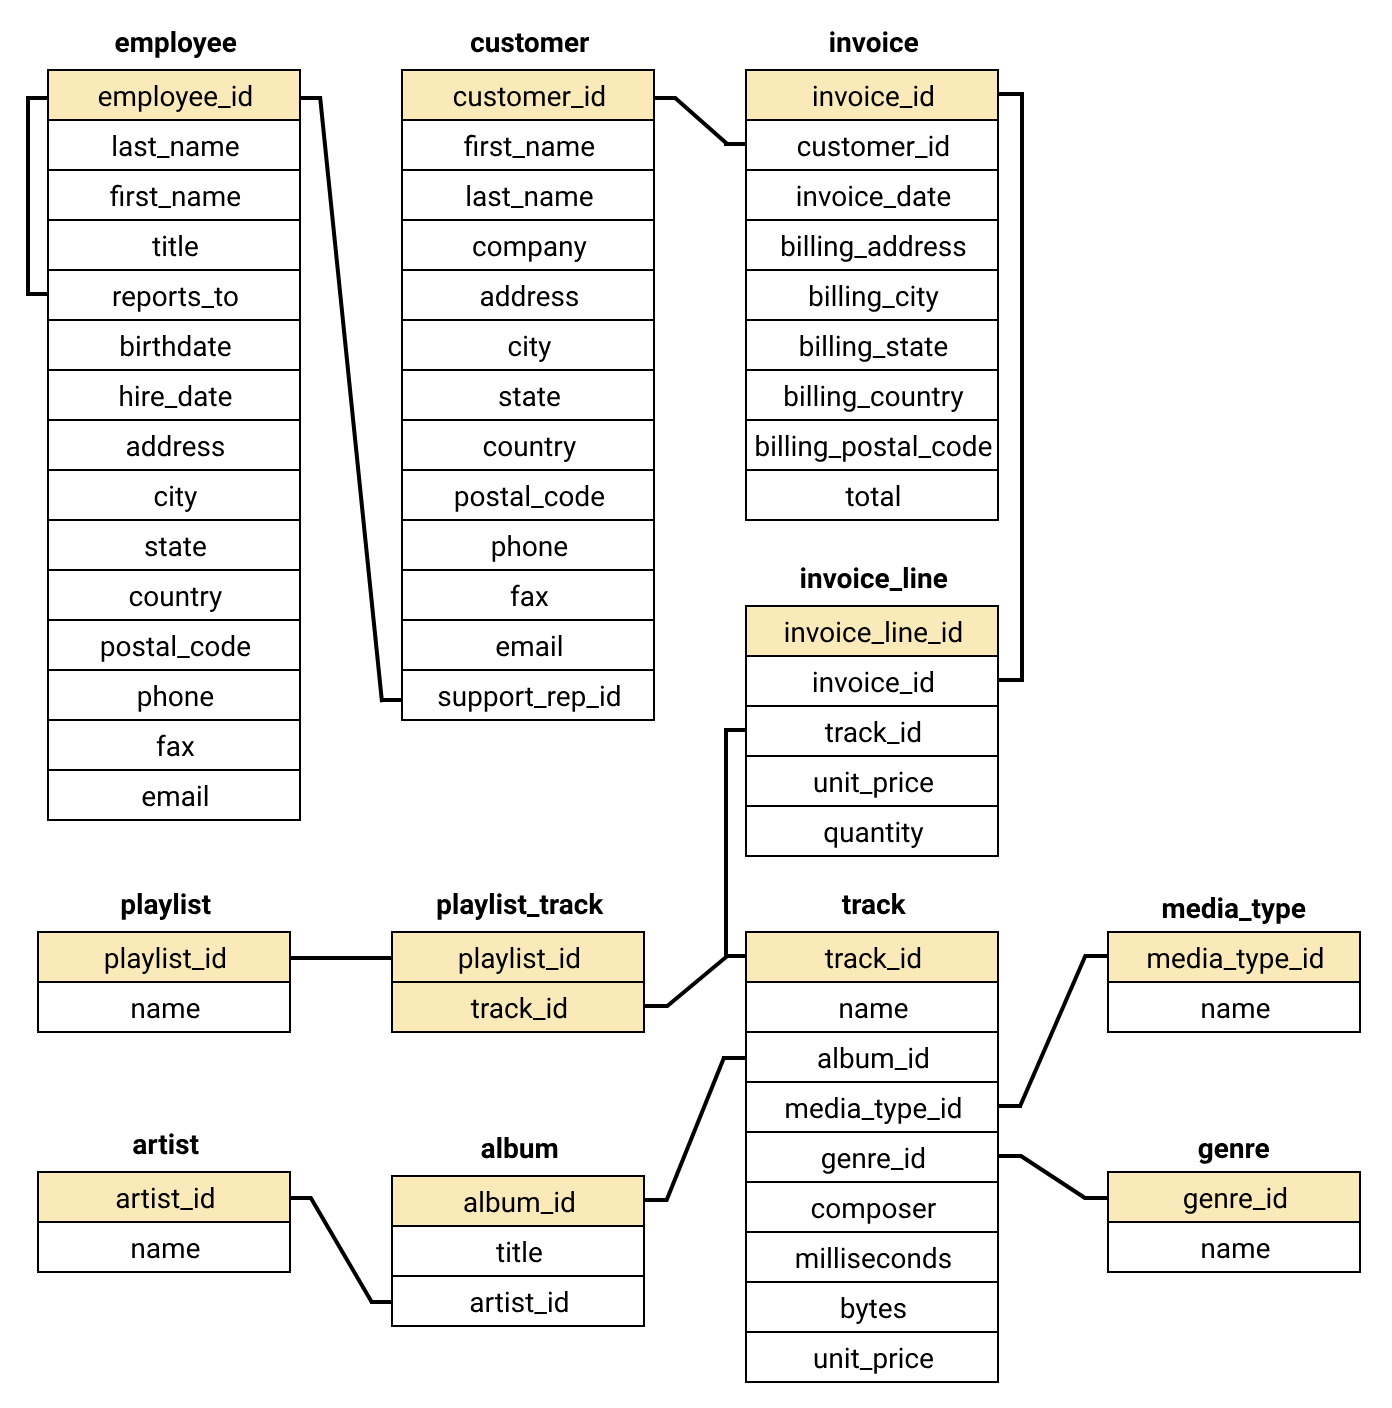

Image 1. Chinook Database Schema.

## Load database

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
%%capture
%load_ext sql
%sql sqlite:///chinook.db # We are using SQLite as an SQL flavor

In [3]:
# The engine helps us use the pandas read_sql function
engine = create_engine('sqlite:///chinook.db')

After we have succesfully loaded the database we will inspect the database to see which tables are inclided. 

In [4]:
%%sql
SELECT
    name,
    type
FROM sqlite_master ------ The master has the table information
WHERE type IN ("table","view");

 * sqlite:///chinook.db
Done.


name,type
album,table
artist,table
customer,table
employee,table
genre,table
invoice,table
invoice_line,table
media_type,table
playlist,table
playlist_track,table


Another interesting first exploratory analisis is to look at the columns on each table. 

In [5]:
%%sql
SELECT *  --- if we load everything then we will see the column names of each table
FROM sqlite_master
WHERE type='table';

 * sqlite:///chinook.db
Done.


type,name,tbl_name,rootpage,sql
table,album,album,2,"CREATE TABLE [album]( [album_id] INTEGER PRIMARY KEY NOT NULL, [title] NVARCHAR(160) NOT NULL, [artist_id] INTEGER NOT NULL, FOREIGN KEY ([artist_id]) REFERENCES [artist] ([artist_id]) ON DELETE NO ACTION ON UPDATE NO ACTION)"
table,artist,artist,3,"CREATE TABLE [artist]( [artist_id] INTEGER PRIMARY KEY NOT NULL, [name] NVARCHAR(120))"
table,customer,customer,4,"CREATE TABLE [customer]( [customer_id] INTEGER PRIMARY KEY NOT NULL, [first_name] NVARCHAR(40) NOT NULL, [last_name] NVARCHAR(20) NOT NULL, [company] NVARCHAR(80), [address] NVARCHAR(70), [city] NVARCHAR(40), [state] NVARCHAR(40), [country] NVARCHAR(40), [postal_code] NVARCHAR(10), [phone] NVARCHAR(24), [fax] NVARCHAR(24), [email] NVARCHAR(60) NOT NULL, [support_rep_id] INTEGER, FOREIGN KEY ([support_rep_id]) REFERENCES [employee] ([employee_id]) ON DELETE NO ACTION ON UPDATE NO ACTION)"
table,employee,employee,5,"CREATE TABLE [employee]( [employee_id] INTEGER PRIMARY KEY NOT NULL, [last_name] NVARCHAR(20) NOT NULL, [first_name] NVARCHAR(20) NOT NULL, [title] NVARCHAR(30), [reports_to] INTEGER, [birthdate] DATETIME, [hire_date] DATETIME, [address] NVARCHAR(70), [city] NVARCHAR(40), [state] NVARCHAR(40), [country] NVARCHAR(40), [postal_code] NVARCHAR(10), [phone] NVARCHAR(24), [fax] NVARCHAR(24), [email] NVARCHAR(60), FOREIGN KEY ([reports_to]) REFERENCES [employee] ([employee_id]) ON DELETE NO ACTION ON UPDATE NO ACTION)"
table,genre,genre,6,"CREATE TABLE [genre]( [genre_id] INTEGER PRIMARY KEY NOT NULL, [name] NVARCHAR(120))"
table,invoice,invoice,7,"CREATE TABLE [invoice]( [invoice_id] INTEGER PRIMARY KEY NOT NULL, [customer_id] INTEGER NOT NULL, [invoice_date] DATETIME NOT NULL, [billing_address] NVARCHAR(70), [billing_city] NVARCHAR(40), [billing_state] NVARCHAR(40), [billing_country] NVARCHAR(40), [billing_postal_code] NVARCHAR(10), [total] NUMERIC(10,2) NOT NULL, FOREIGN KEY ([customer_id]) REFERENCES [customer] ([customer_id]) ON DELETE NO ACTION ON UPDATE NO ACTION)"
table,invoice_line,invoice_line,8,"CREATE TABLE [invoice_line]( [invoice_line_id] INTEGER PRIMARY KEY NOT NULL, [invoice_id] INTEGER NOT NULL, [track_id] INTEGER NOT NULL, [unit_price] NUMERIC(10,2) NOT NULL, [quantity] INTEGER NOT NULL, FOREIGN KEY ([invoice_id]) REFERENCES [invoice] ([invoice_id]) ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ([track_id]) REFERENCES [track] ([track_id]) ON DELETE NO ACTION ON UPDATE NO ACTION)"
table,media_type,media_type,9,"CREATE TABLE [media_type]( [media_type_id] INTEGER PRIMARY KEY NOT NULL, [name] NVARCHAR(120))"
table,playlist,playlist,10,"CREATE TABLE [playlist]( [playlist_id] INTEGER PRIMARY KEY NOT NULL, [name] NVARCHAR(120))"
table,playlist_track,playlist_track,11,"CREATE TABLE [playlist_track]( [playlist_id] INTEGER NOT NULL, [track_id] INTEGER NOT NULL, CONSTRAINT [pk_playlist_track] PRIMARY KEY ([playlist_id], [track_id]), FOREIGN KEY ([playlist_id]) REFERENCES [playlist] ([playlist_id]) ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ([track_id]) REFERENCES [track] ([track_id]) ON DELETE NO ACTION ON UPDATE NO ACTION)"


# Answering questions with data

## Optimization of marketing money

Our client wishes to invest money in marketing but is unsure of the correct music genre in which to start. The following analysis pretends to answer this question by looking at the top-selling music genre in terms of historical sales.


In [6]:
%%sql

SELECT COUNT(*) 
FROM invoice_line;

 * sqlite:///chinook.db
Done.


COUNT(*)
4757


In [7]:
%%sql
WITH INVOICE_GEN AS (
                SELECT il.invoice_id, g.name AS Genre, i.billing_country AS Country
                FROM invoice_line as il
                LEFT JOIN track AS t ON t.track_id = il.track_id
                LEFT JOIN genre as g ON g.genre_id = t.genre_id
                LEFT JOIN invoice as i ON i.invoice_id = il.invoice_id
                )
    


SELECT  Genre, 
        COUNT(*) AS TOT, 
        ROUND(CAST(COUNT(*) AS float)/(SELECT CAST(COUNT(*) AS FLOAT) FROM INVOICE_GEN WHERE Country = 'USA' )*100, 2)  as prop
FROM INVOICE_GEN
WHERE Country = 'USA'
GROUP BY 1
ORDER BY TOT DESC
LIMIT 10;



 * sqlite:///chinook.db
Done.


Genre,TOT,prop
Rock,561,53.38
Alternative & Punk,130,12.37
Metal,124,11.8
R&B/Soul,53,5.04
Blues,36,3.43
Alternative,35,3.33
Pop,22,2.09
Latin,22,2.09
Hip Hop/Rap,20,1.9
Jazz,14,1.33


In [8]:
%%sql
SELECT invoice_id, g.name AS gen
                FROM invoice_line as il
                LEFT JOIN track AS t ON t.track_id = il.track_id
                LEFT JOIN genre as g ON g.genre_id = t.genre_id
                LIMIT 30;
                

 * sqlite:///chinook.db
Done.


invoice_id,gen
1,Rock
1,Rock
1,Rock
1,Rock
1,Rock
1,Rock
1,Rock
1,Rock
1,Rock
1,Rock


##  Analyzing Employee Sales Performance

Each customer for the Chinook store gets assigned to a sales support agent within the company when they first make a purchase. It is of interest to see if any sales support agent is performing either better or worse than the others.

As a starting point it would be of interest to see which sales support agents have the greatest total sales, by amount and by quantity, and see if any patterns emerge.

### Make a view with the relevant information

The first thing to do is to create a View with only the relevant information because we will be doing several queries with this information, and the total information is divided into several tables. To decide which information is relevant we first have to develop some preliminary hypotheses or questions regarding this data.

For example what parameters could affect the total sales of the employees that don't really correlate to their performance or ability?

- It could be possible that some employees have more clients assigned than others.
- Maybe some employees are assigned to countries with higher GDP which means customers with higher purchasing power.
- Some employees could have been working in the company for longer.

Based on these hypotheses we have decided to include the hiring date, invoice date, and billing country.

In [9]:
%%sql
DROP VIEW IF EXISTS employee_sales;

CREATE VIEW employee_sales AS --- Make a view with the relevant information since we will me doing several queries
                SELECT e.employee_id, e.first_name || ' ' || e.last_name as name,  il.unit_price, c.customer_id, i.billing_country, e.country as employee_country, e.hire_date, i.invoice_date
                FROM invoice_line as il
                LEFT JOIN invoice as i ON i.invoice_id = il.invoice_id
                LEFT JOIN customer as c ON c.customer_id = i.customer_id
                LEFT JOIN employee as e ON e.employee_id = c.support_rep_id;
                

SELECT *
FROM employee_sales as es 
LIMIT 5;

 * sqlite:///chinook.db
Done.
Done.
Done.


employee_id,name,unit_price,customer_id,billing_country,employee_country,hire_date,invoice_date
3,Jane Peacock,0.99,18,USA,Canada,2017-04-01 00:00:00,2017-01-03 00:00:00
3,Jane Peacock,0.99,18,USA,Canada,2017-04-01 00:00:00,2017-01-03 00:00:00
3,Jane Peacock,0.99,18,USA,Canada,2017-04-01 00:00:00,2017-01-03 00:00:00
3,Jane Peacock,0.99,18,USA,Canada,2017-04-01 00:00:00,2017-01-03 00:00:00
3,Jane Peacock,0.99,18,USA,Canada,2017-04-01 00:00:00,2017-01-03 00:00:00


### Exploratory data

We will make a query to see how many employees there are, their total sales, their hiring date and total customers. 

In [10]:
%%sql
SELECT employee_id, name, employee_country, hire_date, SUM(unit_price) as total_sales, count(customer_id) as tot_customers
FROM employee_sales as es 
GROUP BY employee_id
ORDER BY hire_date;

 * sqlite:///chinook.db
Done.


employee_id,name,employee_country,hire_date,total_sales,tot_customers
3,Jane Peacock,Canada,2017-04-01 00:00:00,1731.5100000000143,1749
4,Margaret Park,Canada,2017-05-03 00:00:00,1584.000000000013,1600
5,Steve Johnson,Canada,2017-10-17 00:00:00,1393.9200000000112,1408


There are several things to note from our preliminary exploratory data, all of the employees reside in Canada. There are only 3 employees for the entire platform for almost 5 thousand customers. The probability that these employees have a close relationship with their customers is very low. Also, as we predicted, there seems to be a correlation between the hiring date and the sales. This could indicate that there is a correlation between the amount of time working with the company and the total sales, to test this hypothesis we will look at the dates of the first and last sale for each employee to have an idea of how long they have been working with the company.

In [11]:
%%sql
SELECT employee_id, name, employee_country, hire_date, max(invoice_date) as last_sale, min(invoice_date) as first_sale
FROM employee_sales as es 
GROUP BY employee_id
ORDER BY hire_date;

 * sqlite:///chinook.db
Done.


employee_id,name,employee_country,hire_date,last_sale,first_sale
3,Jane Peacock,Canada,2017-04-01 00:00:00,2020-12-30 00:00:00,2017-01-03 00:00:00
4,Margaret Park,Canada,2017-05-03 00:00:00,2020-12-29 00:00:00,2017-01-05 00:00:00
5,Steve Johnson,Canada,2017-10-17 00:00:00,2020-12-20 00:00:00,2017-01-10 00:00:00


First, as we can see from the date of the last sale, all of the employees are active employees at the moment of the database download. Second, There seems to be an inconsistency with the date of the first sale for Margaret and Steve, because the first sales predate their hiring date. This could happen if some customers were assigned to a different employee wich no longer works at the company and were later reassigned to a current representative.

Our last query pretends to see if there is a correlation between the types of countries assigned to each employee.

In [12]:
%%sql
SELECT name, billing_country
FROM employee_sales as es 
GROUP BY employee_id, billing_country
ORDER BY 2 DESC;

 * sqlite:///chinook.db
Done.


name,billing_country
Jane Peacock,United Kingdom
Steve Johnson,United Kingdom
Jane Peacock,USA
Margaret Park,USA
Steve Johnson,USA
Steve Johnson,Sweden
Steve Johnson,Spain
Margaret Park,Portugal
Margaret Park,Poland
Margaret Park,Norway


It is clear from the country information that the highest buying countries are homogenously divided among the employees.

Based on the information gathered there seems to be NO appreciable difference in performance. The amount of sales per representative seems to be more correlated with the time working for the company.

## Sales by country

Analysing the sales of the employees a question comes to mind regarding the sales by country. Since some countries are divided amongst several representatives maybe those countries have the most amount of sales. To test this hypothesis we will look at the total sales by country.

### Make a view with the relevant sales information

The relevant information on sales is distributed among several tables. We will create a view with the relevant information regarding country, customer ID, sales, and number of orders. We will use this information to aggregate data regarding sales by country.


In [13]:
%%sql

DROP VIEW IF EXISTS customer_sales;

CREATE VIEW customer_sales AS --- Make a view with the relevant information since we will me doing several queries
                        SELECT  c.country, c.customer_id AS customer, SUM(i.total) as sales, count(*) as orders
                        FROM invoice as i 
                        LEFT JOIN customer as c ON c.customer_id = i.customer_id
                        GROUP BY customer
                        ORDER BY 2 DESC;
                

SELECT *
FROM customer_sales as cs
ORDER BY country
LIMIT 10;

 * sqlite:///chinook.db
Done.
Done.
Done.


country,customer,sales,orders
Argentina,56,39.6,5
Australia,55,81.18,10
Austria,7,69.3,9
Belgium,8,60.38999999999999,7
Brazil,13,106.91999999999999,15
Brazil,12,82.17,11
Brazil,11,69.3,10
Brazil,10,60.39,12
Brazil,1,108.89999999999998,13
Canada,33,75.24000000000001,12


### Agregate data from country sales

From the exploratory analysis we see that there are several countries who have only one customer, we will collect all of these outliers into an 'Other' catergory so it won't skew or analysis. Also, we will select the relevant information in order to evaluate the sales. 

For each country, we will include:
- total number of customers
- total value of sales
- average value of sales per customer
- average order value

In [14]:
%%sql

DROP VIEW IF EXISTS COUNTRY_SALES; 

CREATE VIEW COUNTRY_SALES AS 
                        SELECT country, COUNT(customer) as customers, SUM(sales) as total, SUM(orders) as tot_order,
                               CASE 
                               WHEN COUNT(customer) < 2 THEN 'Other' --- If a country has les than 2 users we will group them into an 'Others' Category
                               ELSE country
                               END AS country_clean,
                               CASE 
                               WHEN COUNT(customer) < 2 THEN 1  -- Make a hidden column to be able to show the others at the bottom of the list
                               ELSE 0
                               END AS sort
                        FROM customer_sales as cs
                        GROUP BY 1
                        ORDER BY customers DESC;

SELECT country_clean, SUM(customers) AS customers, round(SUM(total), 2) as sales, round(SUM(total)/SUM(customers), 2) AS AVG_customer, round(SUM(total)/SUM(tot_order), 2) as AVG_order
FROM COUNTRY_SALES
GROUP BY country_clean
ORDER BY sort, 3 DESC;
       


 * sqlite:///chinook.db
Done.
Done.
Done.


country_clean,customers,sales,AVG_customer,AVG_order
USA,13,1040.49,80.04,7.94
Canada,8,535.59,66.95,7.05
Brazil,5,427.68,85.54,7.01
France,5,389.07,77.81,7.78
Germany,4,334.62,83.66,8.16
Czech Republic,2,273.24,136.62,9.11
United Kingdom,3,245.52,81.84,8.77
Portugal,2,185.13,92.57,6.38
India,2,183.15,91.58,8.72
Other,15,1094.94,73.0,7.45


As we can see there seems to be a correlation between the number of customers and the total sales by country. Which is to be expected. But it is interesting to observe that the highest-selling countries are not the ones with the highest-paying customers. In this regard, It would be of use to see which countries have the highest spending customers.

In [18]:
%%sql

SELECT country_clean, SUM(customers) AS customers, round(SUM(total), 2) as sales, round(SUM(total)/SUM(customers), 2) AS AVG_customer, round(SUM(total)/SUM(tot_order), 2) as AVG_order
FROM COUNTRY_SALES
GROUP BY country_clean
ORDER BY sort, 4 DESC;

 * sqlite:///chinook.db
Done.


country_clean,customers,sales,AVG_customer,AVG_order
Czech Republic,2,273.24,136.62,9.11
Portugal,2,185.13,92.57,6.38
India,2,183.15,91.58,8.72
Brazil,5,427.68,85.54,7.01
Germany,4,334.62,83.66,8.16
United Kingdom,3,245.52,81.84,8.77
USA,13,1040.49,80.04,7.94
France,5,389.07,77.81,7.78
Canada,8,535.59,66.95,7.05
Other,15,1094.94,73.0,7.45


It is interesting to see these results as they show a potential market in which to spend time growing. The top buying customers are in countries that have few customers. For example, Brazil seems to be a promising country since it has a good amount of customers who also spend an above average amount of money on the store.

## Full album sales Vs Indivual tracks

The store is deciding on whether to continue to buy full albums or individual tracks from artists. To do this the store is analyzing the amount of money spent by customers taking into account if the invoice contains a full album or not.

The store does not let customers purchase a whole album, and then add individual tracks to that same purchase (unless they do that by choosing each track manually). When customers purchase albums they are charged the same price as if they had purchased each of those tracks separately.

Management is currently considering changing its purchasing strategy to save money. The strategy they are considering is to purchase only the most popular tracks from each album from record companies, instead of purchasing every track from an album.

We have been asked to find out what percentage of purchases are individual tracks vs whole albums so that management can use this data to understand the effect this decision might have on overall revenue.

It is very common when you are performing an analysis to have 'edge cases' that prevent you from getting a 100% accurate answer to your question. In this instance, we have two edge cases to consider:

- Albums that have only one or two tracks are likely to be purchased by customers as part of a collection of individual tracks.
- Customers may decide to manually select every track from an album, and then add a few individual tracks from other albums to their purchase.

In the first case, since our analysis is concerned with maximizing revenue we can safely ignore albums consisting of only a few tracks. The company has previously analyzed to confirm that the second case does not happen often, so we can ignore this case also.


In [17]:
%%sql

WITH tracks_album as (  SELECT album_id, COUNT(track_id) as songs_album
                        FROM track as t
                        GROUP BY album_id),
     test_album as   (  SELECT invoice_id, invoice_line_id, count(t.track_id) as songs_bought, t.album_id, ta.songs_album,
                                CASE 
                                WHEN count(t.track_id) < ta.songs_album THEN 0
                                ELSE 1
                                END AS whole_album
                        FROM invoice_line as il 
                        LEFT JOIN track as t ON t.track_id = il.track_id
                        LEFT JOIN tracks_album as ta ON ta.album_id = t.album_id
                        GROUP BY 1,4),
       final_album as  ( SELECT ta2.invoice_id, total,
                                CASE
                                WHEN SUM(whole_album) > 0 THEN 'Whole_album'
                                ELSE 'Individual_tracks'
                                END as whole_album_sale
                        FROM test_album as ta2
                        LEFT JOIN invoice as i ON i.invoice_id = ta2.invoice_id
                        GROUP BY 1)      

SELECT  whole_album_sale  as type_of_sale, ROUND(SUM(total), 2) as sales, COUNT(invoice_id) as number_of_invoices, round(cast(COUNT(invoice_id) as float)/(SELECT COUNT(*) FROM invoice)*100, 2) as percentage
FROM final_album
GROUP BY whole_album_sale;

 * sqlite:///chinook.db
Done.


type_of_sale,sales,number_of_invoices,percentage
Individual_tracks,2554.2,413,67.26
Whole_album,2155.23,201,32.74
